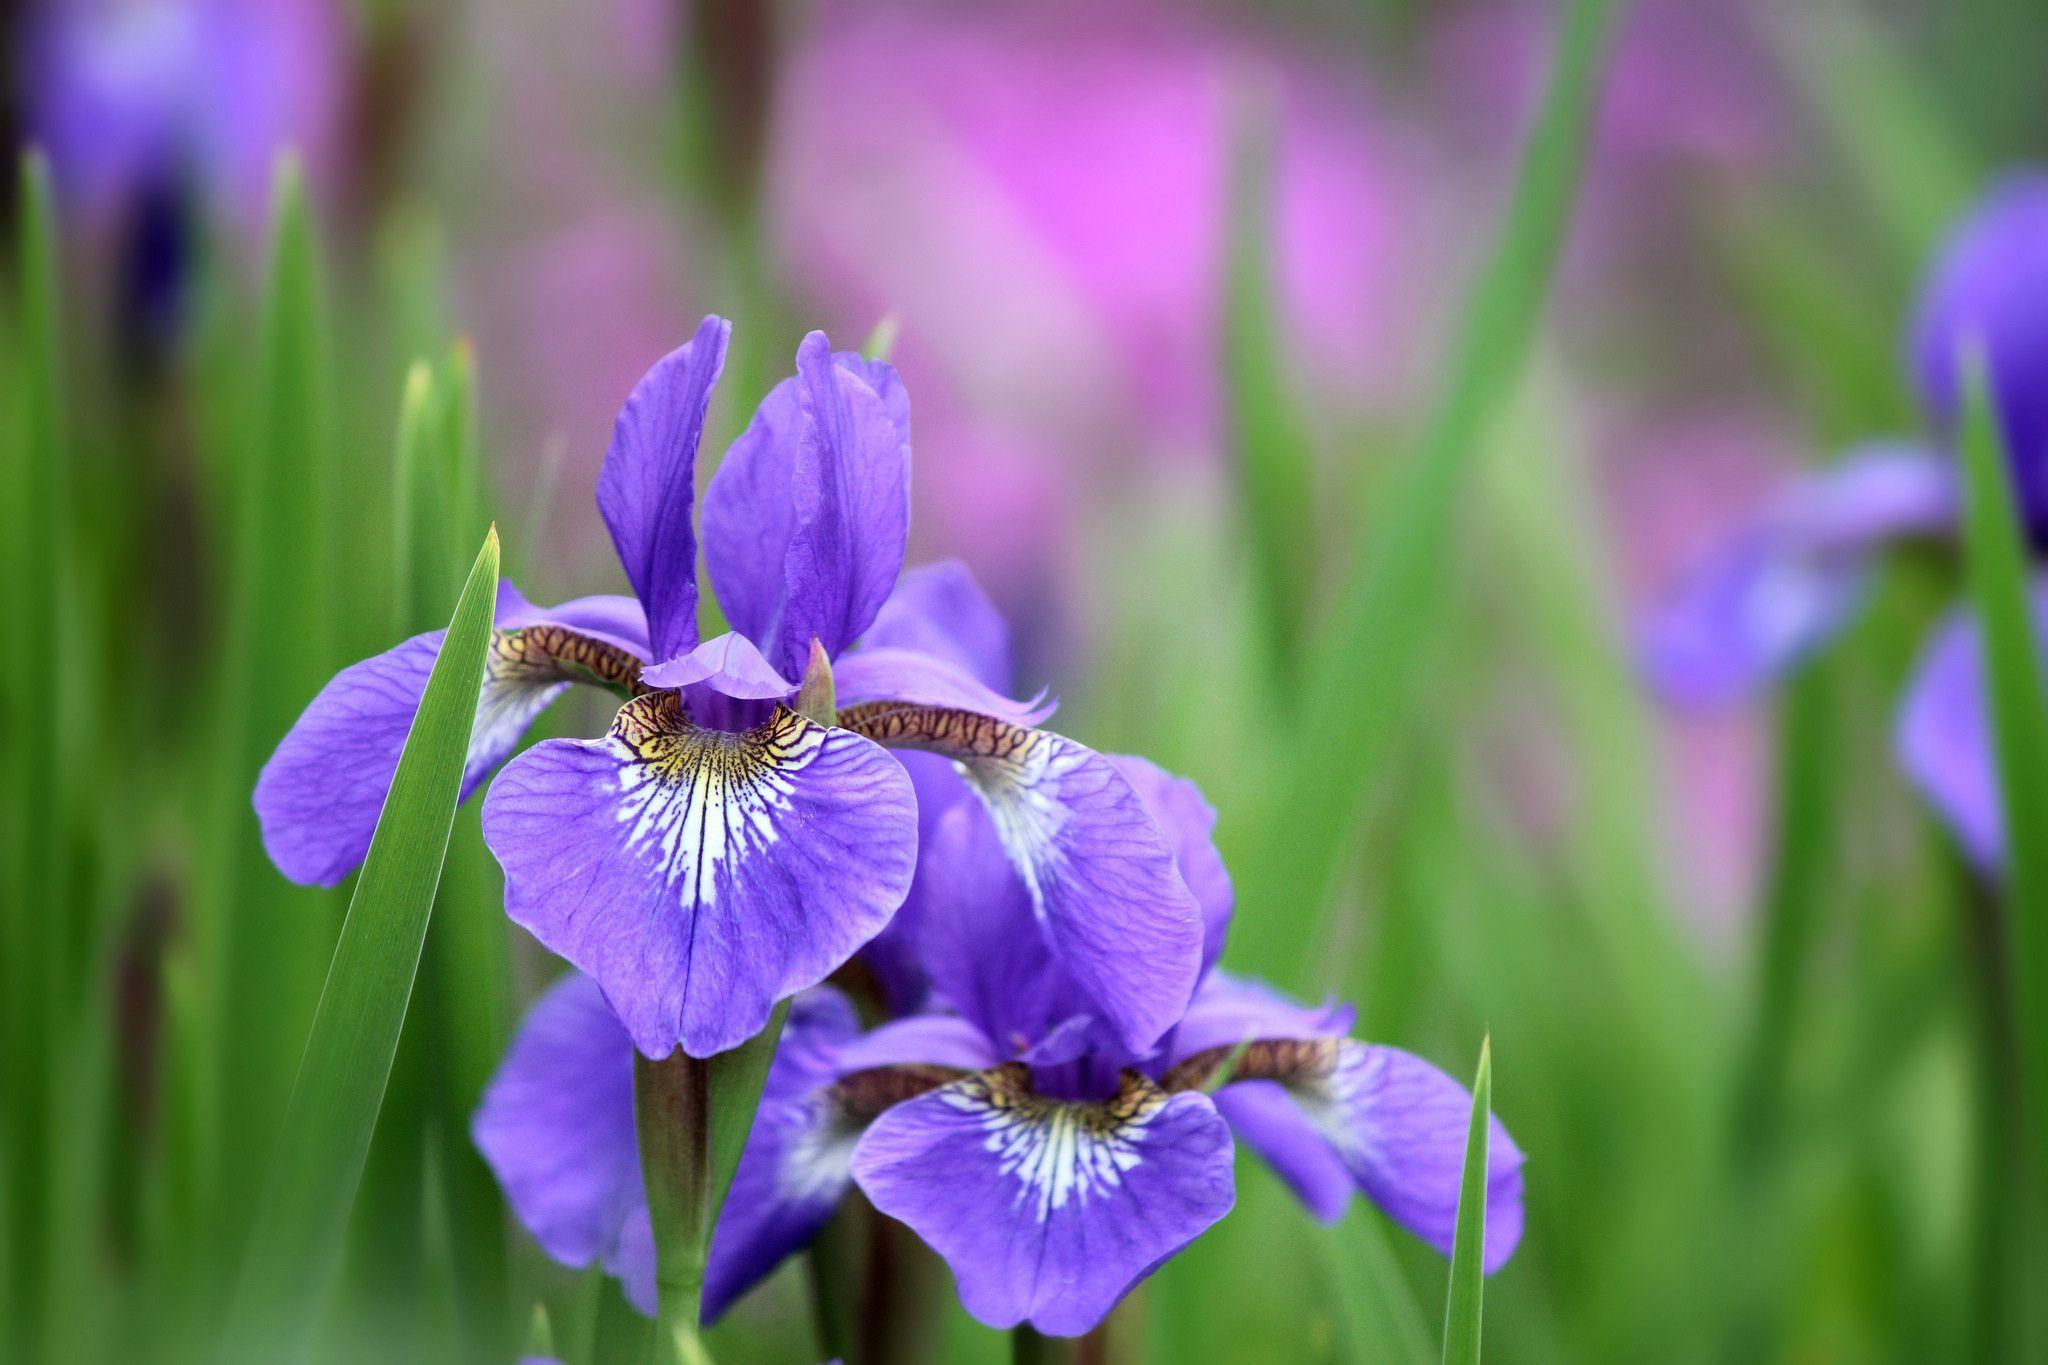

In [46]:
import pandas as pd
from sklearn import metrics
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
# reading the classic iris dataset into a df
iris_df = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")
#mall_df = pd.read_csv('https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv')
print(iris_df.head())
print("\n")
for i in range (0,60):
    print("*",end = '')
print("\n")

print(iris_df.describe())
#X=iris_df.drop(["variety","sepal.width","sepal.length"],axis=1).values
X=iris_df.drop(["variety"],axis=1).values


   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


************************************************************

       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [53]:
from sklearn import datasets
iris = datasets.load_iris()
X, Y = iris.data[:, [2,3]], iris.target

print("Features : ", iris.feature_names)
print("Target : ", iris.target_names)
print('Dataset Size : ', X.shape, Y.shape)


Features :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target :  ['setosa' 'versicolor' 'virginica']
Dataset Size :  (150, 2) (150,)


Ci-dessous, nous avons affiché l'ensemble des données sous forme de nuage de points illustrant la relation entre la longueur des sépales et la largeur des sépales entre chaque échantillon de données. Nous avons également codé les points par couleur selon la catégorie de fleur.

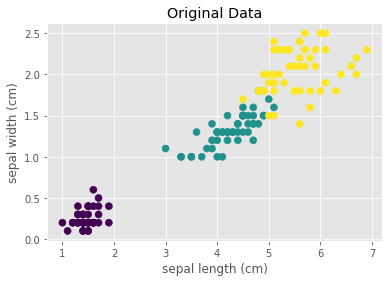

In [54]:
import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    plt.scatter(X[:,0],X[:,1], c = Y, marker="o", s=50)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title("Original Data");

Ici nous avons une méthode nommée plot_actual_prediction_iris pour le plot; qui peut être utilisée pour comparer les données originales et les résultats prédits par DBSCAN.

In [55]:
def plot_actual_prediction_iris(X, Y, Y_preds):
    with plt.style.context(("ggplot", "seaborn")):
        plt.figure(figsize=(17,6))

        plt.subplot(1,2,1)
        plt.scatter(X[Y==0,0],X[Y==0,1], c = 'red', marker="^", s=50)
        plt.scatter(X[Y==1,0],X[Y==1,1], c = 'green', marker="^", s=50)
        plt.scatter(X[Y==2,0],X[Y==2,1], c = 'blue', marker="^", s=50)
        plt.xlabel(iris.feature_names[0])
        plt.ylabel(iris.feature_names[1])
        plt.title("Original Data")

        plt.subplot(1,2,2)
        plt.scatter(X[Y_preds==0,0],X[Y_preds==0,1], c = 'red', marker="^", s=50)
        plt.scatter(X[Y_preds==1,0],X[Y_preds==1,1], c = 'green', marker="^", s=50)
        plt.scatter(X[Y_preds==2,0],X[Y_preds==2,1], c = 'blue', marker="^", s=50)
        plt.xlabel(iris.feature_names[0])
        plt.ylabel(iris.feature_names[1])
        plt.title("Clustering Algorithm Prediction");

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1        0.1
 0.1        0.1        0.1        0.1        0.1    

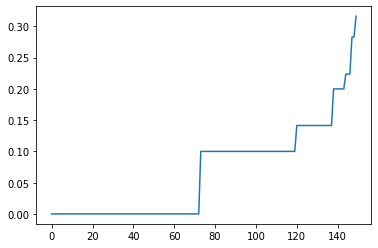

In [50]:
import numpy as np
#L'algorithme de clustering DBSCAN est sensible à la valeur eps que nous choisissons.
#Voici une technique couramment utilisée appelée « méthode knee ».
#L'objectif est de trouver la moyenne des distances de chaque point à ses K voisins les plus proches
#et de sélectionner la distance à laquelle la courbure maximale ou un changement brusque se produit.
#La valeur de K est définie pour être égale à minPoints.
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(X)
distances, indices = nearest_neighbors.kneighbors(X)
distances = np.sort(distances, axis=0)[:, 1]
print(distances)
plt.plot(distances)
plt.show()
#La valeur optimale devrait être la valeur à laquelle nous voyons une courbure maximale qui
#dans ce cas semble être proche de 0,2.

Ajustement de DBSCAN sur les données IRIS avec les paramètres par défaut

In [57]:
from sklearn.cluster import DBSCAN

db = DBSCAN()

Y_preds = db.fit_predict(X)

print(Y_preds)
# on calcul le nombre de clusters en ignorant les points aberrants (-1)
n_clusters_ = len(set(Y_preds)) - (1 if -1 in Y_preds else 0)
n_noise_ = list(Y_preds).count(-1)
print("Le nombre de clusters estimé est: %d" % n_clusters_)
print("Le nombre de points aberants est: %d" % n_noise_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Le nombre de clusters estimé est: 2
Le nombre de points aberants est: 0


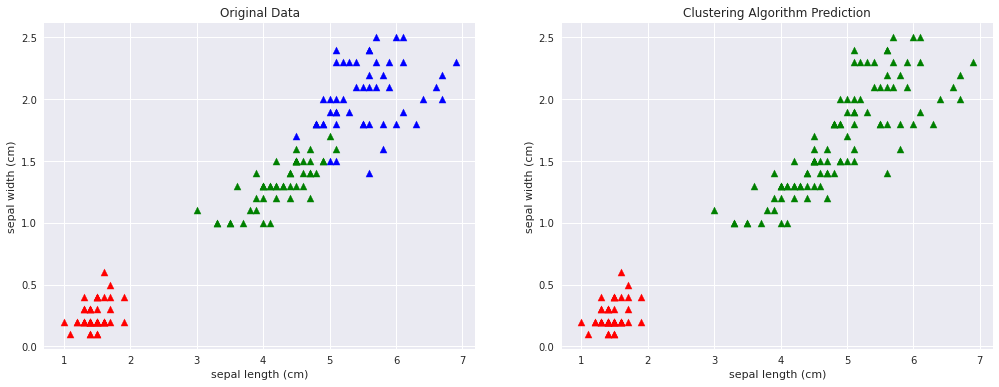

In [58]:
plot_actual_prediction_iris(X, Y, Y_preds)


Evaluation de la performance de DBSCAN

In [59]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(Y, Y_preds)
#Si la valeur de 1,0 est renvoyée, cela signifie que l'algorithme a correctement prédit toutes les 
#étiquettes sinon il revoit 0

0.5681159420289855

On modifie nos parametres tel que eps=0.2 et min_samples=8

In [66]:
db = DBSCAN(eps=0.2, min_samples=8, )

Y_preds = db.fit_predict(X)

print(Y_preds)


# on calcul le nombre de clusters en ignorant les points aberrants (-1)
n_clusters_ = len(set(Y_preds)) - (1 if -1 in Y_preds else 0)
n_noise_ = list(Y_preds).count(-1)
print("Le nombre de clusters estimé est: %d" % n_clusters_)
print("Le nombre de points aberants est: %d" % n_noise_)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1 -1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1  1 -1  1  1  2  1
 -1  1  1  1  1  2  1 -1  1 -1  1  2  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1 -1  1 -1  2 -1 -1 -1 -1  1 -1 -1 -1  2 -1 -1  2 -1 -1 -1 -1 -1 -1
 -1  2 -1  2 -1 -1  2  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1  2 -1
 -1 -1  2  2 -1  2]
Silhouette Coefficient for the Iris Dataset Clusters: 0.51
Le nombre de clusters estimé est: 3
Le nombre de points aberants est: 47


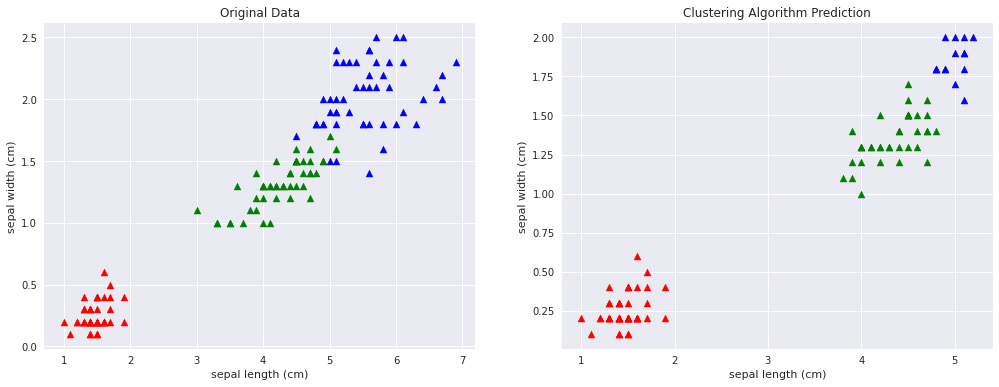

In [64]:
plot_actual_prediction_iris(X, Y, Y_preds)


In [65]:
adjusted_rand_score(Y, Y_preds)


0.69478148725419

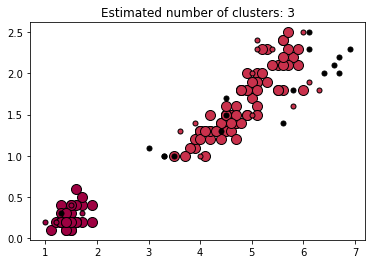

In [85]:
unique_labels = set(Y_preds)
colors = plt.cm.Spectral(np.linspace(0, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = "k"
    
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=col,
    markeredgecolor="k", markersize=10)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=col,
    markeredgecolor="k", markersize=5)
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [31]:

#print(X)
iris_dbscan = DBSCAN(eps=0.5,min_samples=5)
iris_dbscan.fit(X)
labels = iris_dbscan.labels_

#label=-1 signifie que ce point est considéré comme aberrant. Le reste des valeurs representent le numéro du clusters auquels ils appartiennent(qui commence de 0)
print(labels)
# Creating a numpy array with all values set to false by default
# on crée un tableau de la taille "labels" avec toutes les valeurs false
core_samples_mask = np.zeros_like(labels, dtype=bool)
# on modifie le tableau de maniere à ce que tous les points different de -1 soient true
core_samples_mask[iris_dbscan.core_sample_indices_] = True
# on calcul le nombre de clusters en ignorant les points aberrants (-1)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Le nombre de clusters estimé est: %d" % n_clusters_)
print("Le nombre de points aberants est: %d" % n_noise_)
# on calcule le coefficient de silhouette est utilisé pour calculer la qualité d'une technique de clustering. Sa valeur est comprise entre -1 et 1
s = metrics.silhouette_score(X, iris_dbscan.labels_)
print(f"Silhouette Coefficient for the Iris Dataset Clusters: {s:.2f}")

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
Le nombre de clusters estimé est: 2
Le nombre de points aberants est: 17
Silhouette Coefficient for the Iris Dataset Clusters: 0.49
